In [27]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy import stats

from sklearn.preprocessing import MinMaxScaler

In [28]:
df = pd.read_csv("dataset.tsv", sep = "\t")
df.head()

,matrícula,nome,idade,renda,cor,sexo,ano_curso,escola,cod_curso,logradouro,...,uf,cep,gad-1,gad-2,gad-3,gad-4,gad-5,gad-6,gad-7,motivação
0,RA55000001,Osane Inácio Pinhal Ouro,19,418.0,1,2,3,1,5,Viela Vinte e Sete de Setembro,...,SP,04235-090,1,1,1,1,1,1,1,9
1,RA55000002,Zezita Olivares Ferro Telinhos,19,279.0,1,2,3,1,2,Rua Marechal Marques Porto,...,SP,03906-020,0,1,1,1,1,1,1,10
2,RA55000003,Orleis Bilhalva Pereira Moita,19,87.0,1,1,3,1,9,Rua Vinte de Março,...,SP,02326-115,1,0,1,1,1,1,1,10
3,RA55000004,Kaiuan Félix,19,243.0,1,1,3,1,9,Rua João Pires,...,SP,03168-060,1,1,1,1,1,1,1,9
4,RA55000005,Geovan Quaresma Lameirinhas,19,348.0,1,1,3,1,6,Rua São João,...,SP,02920-050,1,1,1,1,1,1,1,9


In [29]:
info = df.info()
info

# Conclusão: não há valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   matrícula   500 non-null    object 
 1   nome        500 non-null    object 
 2   idade       500 non-null    int64  
 3   renda       500 non-null    float64
 4   cor         500 non-null    int64  
 5   sexo        500 non-null    int64  
 6   ano_curso   500 non-null    int64  
 7   escola      500 non-null    int64  
 8   cod_curso   500 non-null    int64  
 9   logradouro  500 non-null    object 
 10  numero      500 non-null    int64  
 11  bairro      500 non-null    object 
 12  cidade      500 non-null    object 
 13  uf          500 non-null    object 
 14  cep         500 non-null    object 
 15  gad-1       500 non-null    int64  
 16  gad-2       500 non-null    int64  
 17  gad-3       500 non-null    int64  
 18  gad-4       500 non-null    int64  
 19  gad-5       500 non-null    i

In [30]:
# Limpeza das colunas que não são relevantes
df.drop(["matrícula", "nome", "cor", "sexo", "escola", "cod_curso", "logradouro", "numero", "bairro", "cidade", "uf", "cep"], axis=1, inplace=True)
df

,idade,renda,ano_curso,gad-1,gad-2,gad-3,gad-4,gad-5,gad-6,gad-7,motivação
0,19,418.00,3,1,1,1,1,1,1,1,9
1,19,279.00,3,0,1,1,1,1,1,1,10
2,19,87.00,3,1,0,1,1,1,1,1,10
3,19,243.00,3,1,1,1,1,1,1,1,9
4,19,348.00,3,1,1,1,1,1,1,1,9
...,...,...,...,...,...,...,...,...,...,...,...
495,31,22669.71,2,2,2,2,1,1,1,1,1
496,45,229643.80,1,2,2,2,2,2,2,2,1
497,32,572939.98,5,2,2,2,2,1,1,1,1
498,34,898004.00,5,1,1,1,1,1,1,1,0


In [31]:
# Remoção dos outliers de renda
df["renda"] = df[df["renda"] <= 22000]["renda"]
df = df.dropna()
df.dropna()

,idade,renda,ano_curso,gad-1,gad-2,gad-3,gad-4,gad-5,gad-6,gad-7,motivação
0,19,418.00,3,1,1,1,1,1,1,1,9
1,19,279.00,3,0,1,1,1,1,1,1,10
2,19,87.00,3,1,0,1,1,1,1,1,10
3,19,243.00,3,1,1,1,1,1,1,1,9
4,19,348.00,3,1,1,1,1,1,1,1,9
...,...,...,...,...,...,...,...,...,...,...,...
490,34,10457.14,4,2,2,2,2,2,2,2,0
491,29,17336.61,5,2,2,2,2,2,2,2,1
492,33,20678.88,1,2,2,2,2,2,2,1,0
493,48,16439.16,2,2,2,2,2,2,2,1,0


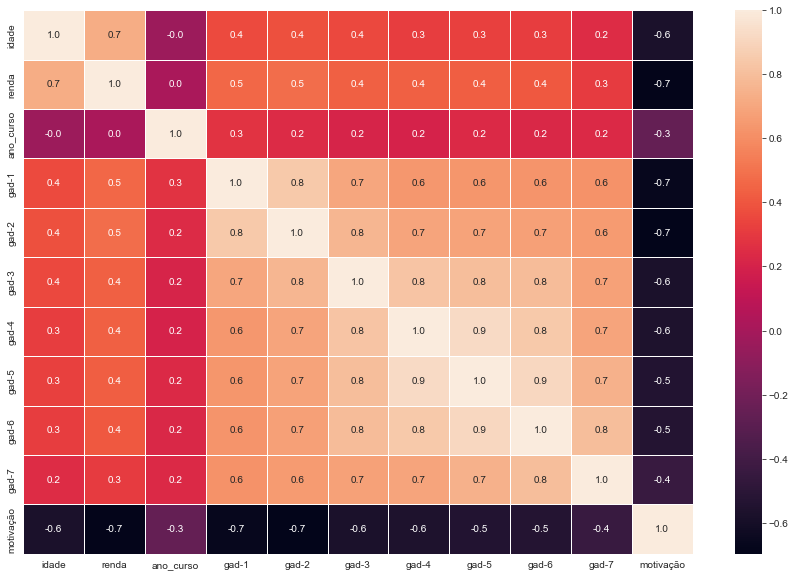

In [32]:
# Matriz de correlação inicial
plt.figure(figsize=(15, 10))

corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot = True, fmt=".2f", linewidths=2)
plt.show()

# Conclusão: há forte correlação entre GAD-7 e motivação

In [33]:
# Adiciona coluna do score total
df['total score'] = df.iloc[:, 3:9].sum(axis=1)
df

/var/folders/j7/3v2f_9hs41gfrvgzvkcdrph00000gn/T/ipykernel_62903/3186599837.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total score'] = df.iloc[:, 3:9].sum(axis=1)


,idade,renda,ano_curso,gad-1,gad-2,gad-3,gad-4,gad-5,gad-6,gad-7,motivação,total score
0,19,418.00,3,1,1,1,1,1,1,1,9,6
1,19,279.00,3,0,1,1,1,1,1,1,10,5
2,19,87.00,3,1,0,1,1,1,1,1,10,5
3,19,243.00,3,1,1,1,1,1,1,1,9,6
4,19,348.00,3,1,1,1,1,1,1,1,9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
490,34,10457.14,4,2,2,2,2,2,2,2,0,12
491,29,17336.61,5,2,2,2,2,2,2,2,1,12
492,33,20678.88,1,2,2,2,2,2,2,1,0,12
493,48,16439.16,2,2,2,2,2,2,2,1,0,12


In [ ]:
sal_min = 1302
def classes(renda):
    if renda <= sal_min:
        return "E"
    elif renda <= (2*sal_min):
        return "D"
    elif renda <= (3*sal_min):
        return "C"
    elif renda <= (5*sal_min):
        return "B"
    elif renda >= (5*sal_min):
        return "A"
df['classe'] = df['renda'].apply(classes)

In [ ]:
graph1 = sns.barplot(data=df, x="classe", y="total score")
sns.set(rc={'figure.figsize':(20,10)})
plt.xlabel("Classes sociais")
plt.ylabel("Score do GAD-7")
plt.title("Gráfico das faixas de renda por score do GAD-7")
plt.show()

In [ ]:
graph2 = sns.barplot(data=df, x="idade", y="total score")
sns.set(rc={'figure.figsize':(20,10)})
plt.xlabel("Idade")
plt.ylabel("Score do GAD-7")
plt.title("Gráfico da idade por score do GAD-7")
plt.show()

# Conclusão: pessoas de idade mais avançada tendem a ter um score do GAD-7 mais elevado

In [34]:
# Retorna somente as colunas com score >= 10
df["total score"] = df[df["total score"] >= 10]["total score"]
df = df.dropna()
df.dropna()

# Conclusão: 159 alunos em prováveis condições de transtorno de ansiedade generalizada

/var/folders/j7/3v2f_9hs41gfrvgzvkcdrph00000gn/T/ipykernel_62903/3746698854.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["total score"] = df[df["total score"] >= 10]["total score"]


,idade,renda,ano_curso,gad-1,gad-2,gad-3,gad-4,gad-5,gad-6,gad-7,motivação,total score
62,19,792.99,3,1,2,2,2,2,2,2,9,11.0
72,19,821.99,3,2,2,2,2,2,2,2,9,12.0
121,19,722.99,3,2,2,2,2,2,2,2,10,12.0
157,19,1901.98,3,2,2,2,1,1,2,2,6,10.0
163,19,1402.99,3,2,2,2,1,1,2,2,6,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...
490,34,10457.14,4,2,2,2,2,2,2,2,0,12.0
491,29,17336.61,5,2,2,2,2,2,2,2,1,12.0
492,33,20678.88,1,2,2,2,2,2,2,1,0,12.0
493,48,16439.16,2,2,2,2,2,2,2,1,0,12.0


In [ ]:
df.drop(["classe"], axis=1, inplace=True)
df

In [35]:
df.dtypes

idade            int64
renda          float64
ano_curso        int64
gad-1            int64
gad-2            int64
gad-3            int64
gad-4            int64
gad-5            int64
gad-6            int64
gad-7            int64
motivação        int64
total score    float64
dtype: object

In [36]:
# Normalização dos dados
obj_normalizacao = MinMaxScaler().fit(df)
df_normalizado = obj_normalizacao.transform(df)
df_normalizado

array([[0.        , 0.00337396, 0.5       , ..., 0.5       , 0.9       ,
        0.125     ],
       [0.        , 0.00477174, 0.5       , ..., 0.5       , 0.9       ,
        0.25      ],
       [0.        , 0.        , 0.5       , ..., 0.5       , 1.        ,
        0.25      ],
       ...,
       [0.4516129 , 0.96186175, 0.        , ..., 0.        , 0.        ,
        0.25      ],
       [0.93548387, 0.75750983, 0.25      , ..., 0.        , 0.        ,
        0.25      ],
       [0.32258065, 1.        , 0.75      , ..., 0.5       , 0.        ,
        0.25      ]])

In [37]:
#Transformando em um DataFrame
df_normalizado = pd.DataFrame(df_normalizado)
df_normalizado.columns = ["idade", "renda", "ano_curso", "gad-1", "gad-2", "gad-3", "gad-4", "gad-5", "gad-6", "gad-7",
                          "motivacao", "total score"]
df_normalizado.head()

,idade,renda,ano_curso,gad-1,gad-2,gad-3,gad-4,gad-5,gad-6,gad-7,motivacao,total score
0,0.0,0.003374,0.5,0.0,0.0,0.5,0.5,0.5,0.5,0.5,0.9,0.125
1,0.0,0.004772,0.5,0.5,0.0,0.5,0.5,0.5,0.5,0.5,0.9,0.250
2,0.0,0.000000,0.5,0.5,0.0,0.5,0.5,0.5,0.5,0.5,1.0,0.250
3,0.0,0.056827,0.5,0.5,0.0,0.5,0.0,0.0,0.5,0.5,0.6,0.000
4,0.0,0.032776,0.5,0.5,0.0,0.5,0.0,0.0,0.5,0.5,0.6,0.000


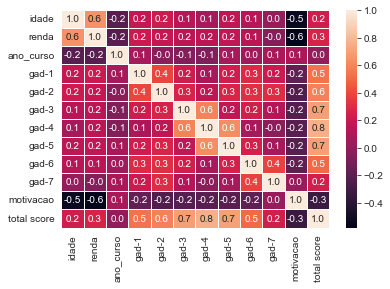

In [38]:
# Matriz de correlação após normalização com total score
corr_matrix = df_normalizado.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot = True, fmt=".2f", linewidths=2)
plt.show()

# Conclusão: há forte correlação entre idade/renda e motivação, além do gad-3 e gad-4

In [39]:
df_normalizado.drop(["total score"], axis=1, inplace=True)
df_normalizado

,idade,renda,ano_curso,gad-1,gad-2,gad-3,gad-4,gad-5,gad-6,gad-7,motivacao
0,0.000000,0.003374,0.50,0.0,0.0,0.5,0.5,0.5,0.5,0.5,0.9
1,0.000000,0.004772,0.50,0.5,0.0,0.5,0.5,0.5,0.5,0.5,0.9
2,0.000000,0.000000,0.50,0.5,0.0,0.5,0.5,0.5,0.5,0.5,1.0
3,0.000000,0.056827,0.50,0.5,0.0,0.5,0.0,0.0,0.5,0.5,0.6
4,0.000000,0.032776,0.50,0.5,0.0,0.5,0.0,0.0,0.5,0.5,0.6
...,...,...,...,...,...,...,...,...,...,...,...
154,0.483871,0.469180,0.75,0.5,0.0,0.5,0.5,0.5,0.5,0.5,0.0
155,0.322581,0.800766,1.00,0.5,0.0,0.5,0.5,0.5,0.5,0.5,0.1
156,0.451613,0.961862,0.00,0.5,0.0,0.5,0.5,0.5,0.5,0.0,0.0
157,0.935484,0.757510,0.25,0.5,0.0,0.5,0.5,0.5,0.5,0.0,0.0


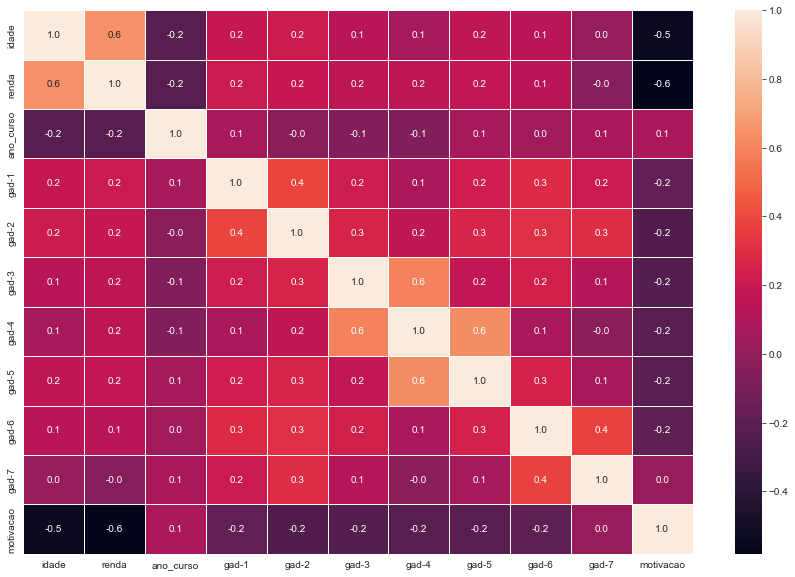

In [42]:
# Matriz de correlação após normalização sem total score
plt.figure(figsize=(15, 10))
corr_matrix = df_normalizado.corr()
sns.heatmap(corr_matrix, annot = True, fmt=".2f", linewidths=2)
plt.show()

In [62]:
df

,idade,renda,ano_curso,gad-1,gad-2,gad-3,gad-4,gad-5,gad-6,gad-7,motivação,total score,classe
62,19,792.99,3,1,2,2,2,2,2,2,9,11.0,1
72,19,821.99,3,2,2,2,2,2,2,2,9,12.0,1
121,19,722.99,3,2,2,2,2,2,2,2,10,12.0,1
157,19,1901.98,3,2,2,2,1,1,2,2,6,10.0,2
163,19,1402.99,3,2,2,2,1,1,2,2,6,10.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,34,10457.14,4,2,2,2,2,2,2,2,0,12.0,2
491,29,17336.61,5,2,2,2,2,2,2,2,1,12.0,2
492,33,20678.88,1,2,2,2,2,2,2,1,0,12.0,2
493,48,16439.16,2,2,2,2,2,2,2,1,0,12.0,2


In [ ]:
df_normalizado